In [1]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

# Лабораторна робота №1

## Варіант 1 
$\begin{cases}
   \dot{x} = y^2 - 4x^2  \\
   \dot{y} = 2x -1
\end{cases}$

In [2]:
P = lambda x, y: y**2 - 4 * x**2
Q = lambda x, y: 2 * x - 1

## Побудова траекторії, що починається в довільній точці

In [3]:
def phase_portrait(P, Q, N=10000, 
                   x0=1, y0=1, 
                   alpha_x=10**-3, alpha_y=10**-3, **kwargs):
    xi = [x0]
    yi = [y0]
    for i in range(N):
        Vx = P(xi[-1], yi[-1])
        Vy = Q(xi[-1], yi[-1])
        Vx_ = Vx / np.sqrt(Vx**2 + Vy**2)
        Vy_ = Vy / np.sqrt(Vx**2 + Vy**2)
        xi.append(xi[-1] + alpha_x * Vx_)
        yi.append(yi[-1] + alpha_y * Vy_)
    return xi, yi

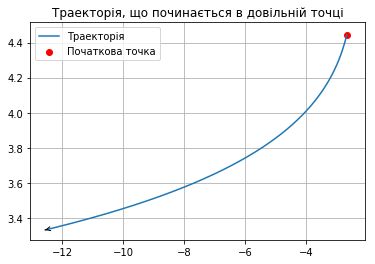

In [4]:
x0 = np.random.uniform(-5, 5)
y0 = np.random.uniform(-5, 5)
xline, yline = phase_portrait(P, Q, x0=x0, y0=y0)
plt.grid()
plt.plot(xline, yline, label='Траекторія')
plt.scatter(xline[:1], yline[:1], c='r', label='Початкова точка')
plt.annotate("", xy=(xline[-1], yline[-1]),
             xytext=(xline[-2], yline[-2]), 
             arrowprops=dict(arrowstyle="->"))
plt.legend()
plt.title('Траекторія, що починається в довільній точці');

## Побудова фазового портрету

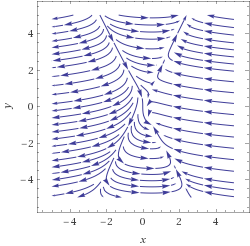

In [5]:
def plot_phase_portrait(P, Q, evolution_func=phase_portrait,
                        num_iter=1000,
                        xmin=-5, xmax=5,
                        ymin=-5, ymax=5,
                        num_x=25, num_y=25,
                        alpha_x=10**-3, alpha_y=10**-3,
                        generator_x=lambda x:1, generator_y=lambda x:1,
                        linewidth=0.5, c='b', show_arrow=True):
    x = np.linspace(xmin, xmax, num_x)
    y = np.linspace(ymin, ymax, num_y)
    xv, yv = np.meshgrid(x, y)
    xi, yi = evolution_func(P, Q, N=num_iter,
                            x0=xv.flatten(), y0=yv.flatten(),  
                            alpha_x=alpha_x, alpha_y=alpha_y,
                            generator_x=generator_x, generator_y=generator_y)
    xi, yi = np.array(xi), np.array(yi)
    plt.figure(figsize=(10, 10))
    plt.title('Фазовий портрет')
    plt.plot(xi, yi, c=c, linewidth=linewidth)
    if show_arrow:
        for i in range(xi.shape[1]):
            plt.annotate("", xy=(xi[-1, i], yi[-1, i]),
                         xytext=(xi[-2, i], yi[-2, i]), 
                         arrowprops=dict(arrowstyle="->", color=c))
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.grid()

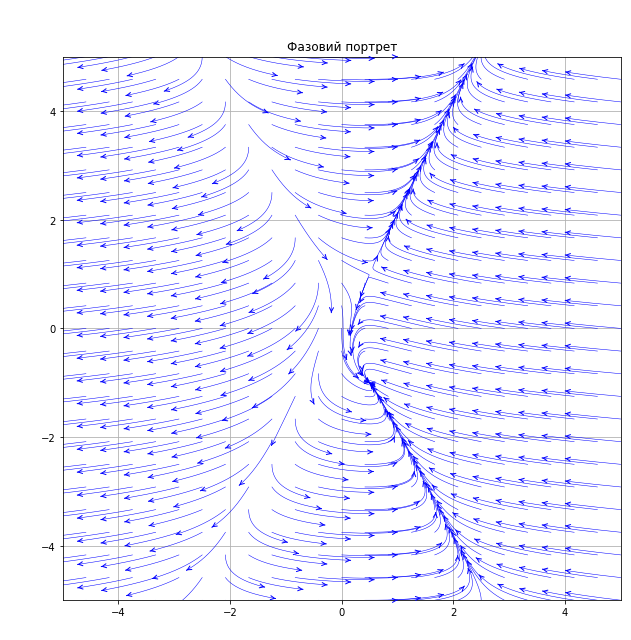

In [6]:
plot_phase_portrait(P, Q)

## Поведінка тректорій в околах особливих точок

Особливі точки системи:
- $[1, 1/2]$
- $[-1, 1/2]$

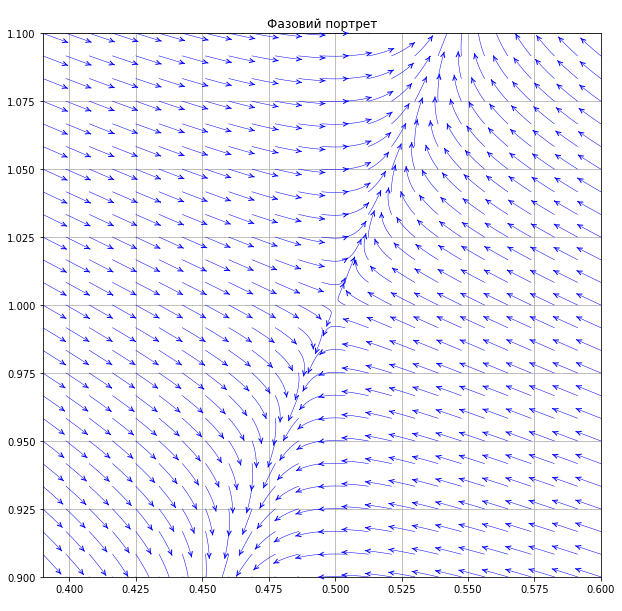

In [7]:
plot_phase_portrait(P, Q, 
                    xmin=0.5-0.11, 
                    xmax=0.5+0.1, 
                    ymin=1-0.1, 
                    ymax=1+0.1, 
                    alpha_x=10**-5, 
                    alpha_y=10**-5)

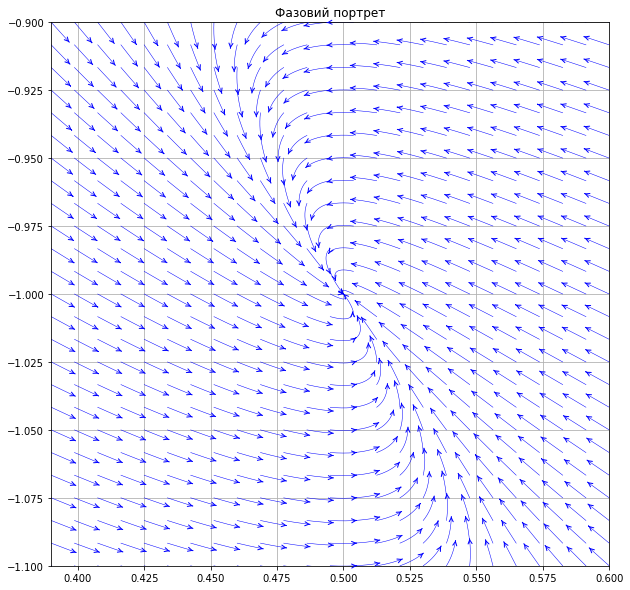

In [8]:
plot_phase_portrait(P, Q, 
                    xmin=0.5-0.11, 
                    xmax=0.5+0.1, 
                    ymin=-1-0.1, 
                    ymax=-1+0.1, 
                    alpha_x=10**-5, 
                    alpha_y=10**-5)

## Підбір параметрів кроків $\alpha_x$ та $\alpha_y$

In [9]:
def phase_portrait_with_variable_alpha(P, Q, generator_x=lambda x, y: 1, 
                                       generator_y=lambda x, y: 1, 
                                       N=10000, x0=1, y0=1, 
                                       alpha_x=10**-3, alpha_y=10**-3):
    xi = [x0]
    yi = [y0]
    for i in range(N):
        Vx = P(xi[-1], yi[-1])
        Vy = Q(xi[-1], yi[-1])
        Vx_ = Vx / np.sqrt(Vx**2 + Vy**2)
        Vy_ = Vy / np.sqrt(Vx**2 + Vy**2)
        Cx = generator_x(alpha_x, i)
        Cy = generator_y(alpha_y, i)
        xi.append(xi[-1] + Cx * alpha_x * Vx_)
        yi.append(yi[-1] + Cy * alpha_y * Vy_)
        
    return xi, yi

In [10]:
def generator_x1(alpha, i):
    return np.abs(np.sin(i))
def generator_y1(alpha, i):
    return np.abs(np.sin(i))

In [11]:
def generator_x2(alpha, i):
    return 1 + (i/(1+i))**(alpha**-1)
def generator_y2(alpha, i):
    return 1 + (i/(1+i))**(alpha**-1)

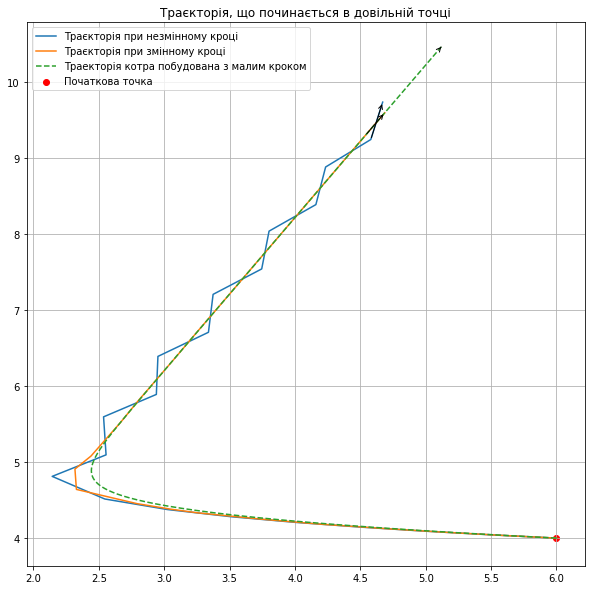

In [12]:
x0 = 6
y0 = 4
# x0 = np.random.uniform(-5, 5)
# y0 = np.random.uniform(-5, 5)
xline_cons, yline_const = phase_portrait(P, Q,x0=x0, y0=y0, alpha_x=1/2, alpha_y=1/2, N=20)
xline_real, yline_real = phase_portrait(P, Q,x0=x0, y0=y0, alpha_x=0.001, alpha_y=0.001, N=10000)
xline_var, yline_var = phase_portrait_with_variable_alpha(P, Q, generator_x=generator_x1,
                                                          generator_y=generator_y1, x0=x0, y0=y0, alpha_x=1/2, alpha_y=1/2,  N=30)
plt.figure(figsize=(10, 10))
plt.plot(xline_cons, yline_const, label='Траєкторія при незмінному кроці')
plt.annotate("", xy=(xline_cons[-1], yline_const[-1]),
             xytext=(xline_cons[-2], yline_const[-2]), 
             arrowprops=dict(arrowstyle="->"))

plt.plot(xline_var, yline_var, label='Траєкторія при змінному кроці')
plt.annotate("", xy=(xline_var[-1], yline_var[-1]),
             xytext=(xline_var[-2], yline_var[-2]), 
             arrowprops=dict(arrowstyle="->"))

plt.plot(xline_real, yline_real, '--',label='Траекторія котра побудована з малим кроком')
plt.annotate("", xy=(xline_real[-1], yline_real[-1]),
             xytext=(xline_real[-2], yline_real[-2]), 
             arrowprops=dict(arrowstyle="->"))

plt.scatter(xline_cons[:1], yline_const[:1], c='r', label='Початкова точка')
plt.legend()
plt.grid()
plt.title('Траєкторія, що починається в довільній точці');

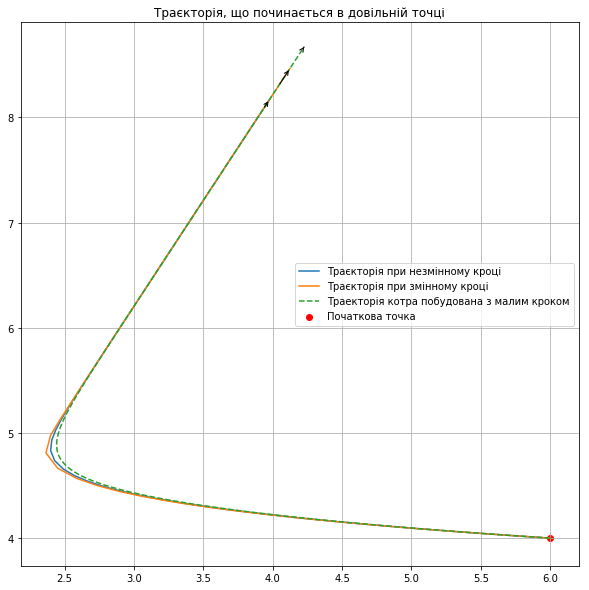

In [13]:
x0 = 6
y0 = 4
# x0 = np.random.uniform(-5, 5)
# y0 = np.random.uniform(-5, 5)
xline_cons, yline_const = phase_portrait(P, Q,x0=x0, y0=y0, alpha_x=0.1, alpha_y=0.1, N=75)
xline_real, yline_real = phase_portrait(P, Q,x0=x0, y0=y0, alpha_x=0.001, alpha_y=0.001, N=8000)
xline_var, yline_var = phase_portrait_with_variable_alpha(P, Q, generator_x=generator_x2,
                                                          generator_y=generator_y2, x0=x0, y0=y0, alpha_x=0.1, alpha_y=0.1 , N=50)
plt.figure(figsize=(10, 10))
plt.plot(xline_cons, yline_const, label='Траєкторія при незмінному кроці')
plt.annotate("", xy=(xline_cons[-1], yline_const[-1]),
             xytext=(xline_cons[-2], yline_const[-2]), 
             arrowprops=dict(arrowstyle="->"))

plt.plot(xline_var, yline_var, label='Траєкторія при змінному кроці')
plt.annotate("", xy=(xline_var[-1], yline_var[-1]),
             xytext=(xline_var[-2], yline_var[-2]), 
             arrowprops=dict(arrowstyle="->"))


plt.plot(xline_real, yline_real, '--',label='Траекторія котра побудована з малим кроком')
plt.annotate("", xy=(xline_real[-1], yline_real[-1]),
             xytext=(xline_real[-2], yline_real[-2]), 
             arrowprops=dict(arrowstyle="->"))

plt.scatter(xline_cons[:1], yline_const[:1], c='r', label='Початкова точка')
plt.legend()
plt.grid()
plt.title('Траєкторія, що починається в довільній точці');

### Фазовий портрет системи з сталим кроком

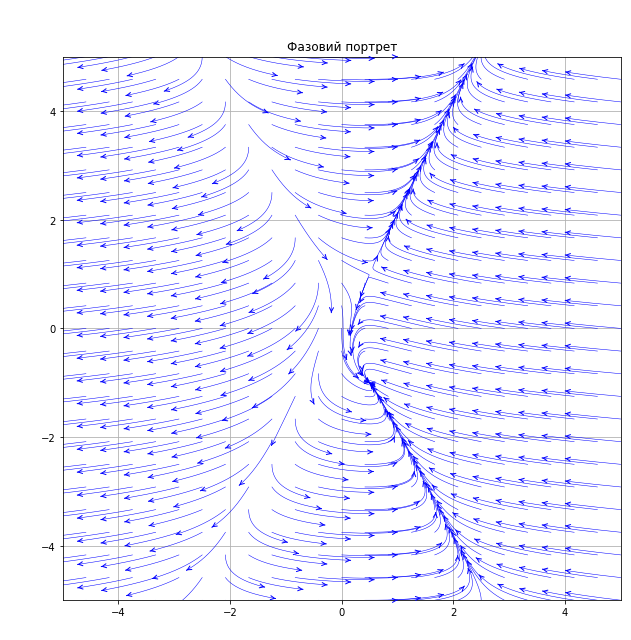

In [14]:
plot_phase_portrait(P, Q)

### Фазовий портрет системи з змінним кроком(1 правило)

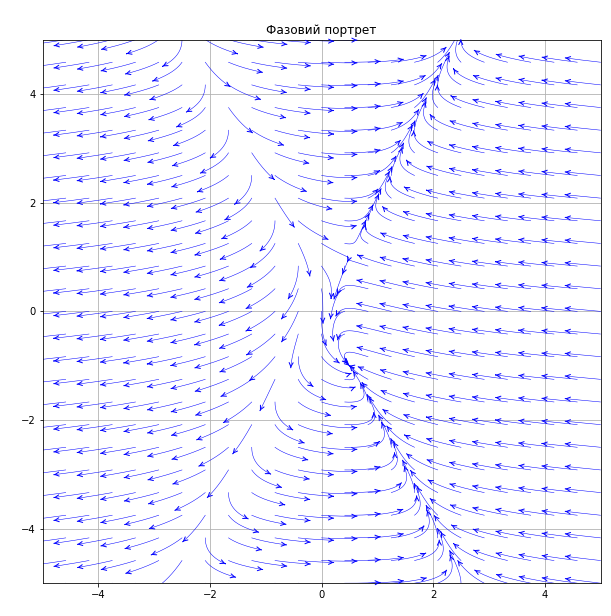

In [15]:
plot_phase_portrait(P, Q, evolution_func=phase_portrait_with_variable_alpha, 
                    generator_x=generator_x1, generator_y=generator_y1)

### Фазовий портрет системи з змінним кроком(2 правило)

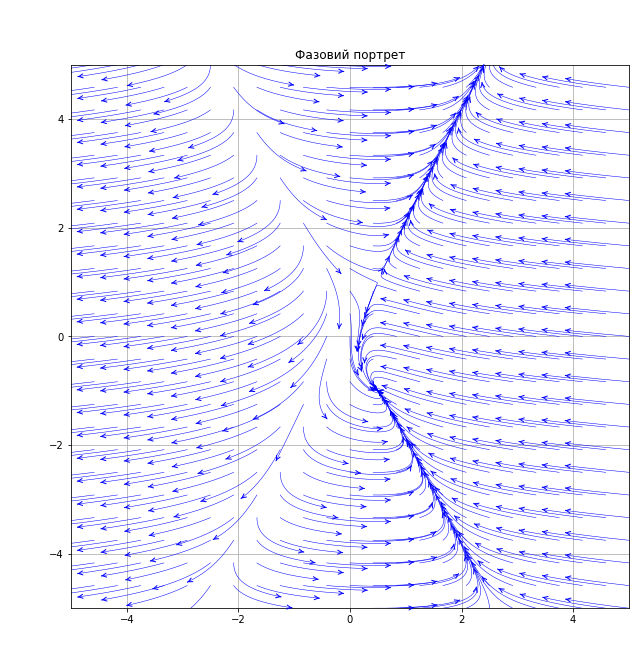

In [16]:
plot_phase_portrait(P, Q, evolution_func=phase_portrait_with_variable_alpha, 
                    generator_x=generator_x2, generator_y=generator_y2)